In [57]:
#clone the repository to google colab 
!git clone https://github.com/mattharding23/ANLY_645_Project.git

fatal: destination path 'ANLY_645_Project' already exists and is not an empty directory.


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd 
import numpy as np
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt

In [60]:
#read data in 

##if not using colab, this part still can be directedly imported by pandas 
artist = pd.read_feather('ANLY_645_Project/data/artists_relations.feather')
songs = pd.read_feather('ANLY_645_Project/data/artists_top_10_songs.feather')

#remove all special symbols from the song names 
songs.song_name = songs.song_name.str.replace('[#,@,&,(,),$]', '')

#have a look of both data
artist.head()
#count number of genres each artist has 
artist['genres_num'] = artist['genres'].str.len()

#remove special symbos in the column 
artist.artist = artist.artist.str.replace('[#,@,&,$]', '')
artist.related_to = artist.related_to.str.replace('[#,@,&,$]', '')
#remove NAs in related to column
artist = artist[artist['related_to'].notna()]
#extract all relations to use as edges, artists as nodes 
Edges = []
Nodes = []
Node_size = []
Edge_weights = []
Node_color = []

#have distinct nodes from dataframe 
nod = artist[['artist','popularity','genres_num']]
#drop duplicate 
nod1 = nod.drop_duplicates(keep='first')
#now we can have the node 
nod1
for index, rows in nod1.iterrows():
    Nodes.append(rows.artist)
    Node_color.append(rows.genres_num)
    #make sizes more obvious
    size = rows.popularity
    if size in range(0,20):
      size = size*5
    elif size in range(20,30):
      size = size*10
    elif size in range(30,45):
      size = size*15    
    elif size in range(45,65):
      size = size*20
    elif size>= 65:
      size = size*100
   
    Node_size.append(size)

#have edges on board
for index, rows in artist.iterrows():
    #make iterable 
    temp =(rows.artist, rows.related_to)
    #check if both nodes are inside the nodes list 
    if temp[0] in Nodes and temp[1] in Nodes:
      Edges.append(temp)
      Edge_weights.append(rows.collaborations)
      


#drop the genres column 
artist = artist.drop(['genres'], axis=1)

#save the node information as a dataframe 

zipped = list(zip(Nodes, Node_size, Node_color))
Nodeinfo = pd.DataFrame(zipped, columns = ['node','node_size','node_color'])
Nodeinfo.to_csv('Node_info.csv',index = False)

#also save the edge info to a dataframe 
zipped1 = list(zip(Edges,Edge_weights))
Edgeinfo = pd.DataFrame(zipped1, columns = ['edge','edge_weight'])
Edgeinfo.to_csv('Edge_info.csv',index = False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


In [61]:
songs.head()

,song_id,song_name,song_popularity,artist_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks feat. 21 Savage,93.0,3TVXtAsR1Inumwj472S9r4,0.529,0.673,0.0,-4.711,1.0,0.1750,0.000307,0.000002,0.0930,0.3660,165.921,218365.0
1,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U feat. Drake Tems,90.0,3TVXtAsR1Inumwj472S9r4,0.463,0.642,1.0,-4.474,1.0,0.3400,0.314000,0.000000,0.0686,0.3390,83.389,189893.0
2,4rmVZajAF7PkrCagGPHbqa,Sticky,86.0,3TVXtAsR1Inumwj472S9r4,0.853,0.495,6.0,-14.630,1.0,0.1400,0.091700,0.000217,0.0844,0.0774,137.027,243228.0
3,0oiv4E896TUTTeQU0cmIui,Massive,82.0,3TVXtAsR1Inumwj472S9r4,0.499,0.671,4.0,-6.774,0.0,0.0561,0.114000,0.016900,0.1480,0.0557,124.994,336924.0
4,1zi7xx7UVEFkmKfv06H8x0,One Dance,86.0,3TVXtAsR1Inumwj472S9r4,0.792,0.625,1.0,-5.609,1.0,0.0536,0.007760,0.001800,0.3290,0.3700,103.967,173987.0


In [62]:
#merge songs to artists based on artists id 
con = sqlite3.connect('645d')
#convert dataframe to database and manipulate by sql


artist.to_sql('artists', con,index=False,if_exists="replace")
#, index=False
songs.to_sql('songs', con, if_exists='replace')
cur = con.cursor()
cur.execute("SELECT *FROM artists a INNER JOIN songs s on a.id = s.artist_id")
cur.fetchone()

('J. Cole',
 'Drake',
 '6l3HvQ5sa6mXTsMTB19rO5',
 '3TVXtAsR1Inumwj472S9r4',
 84.0,
 17438272.0,
 2.0,
 4.0,
 20,
 '68Dni7IE4VyPkTOH9mRWHr',
 'No Role Modelz',
 87.0,
 '6l3HvQ5sa6mXTsMTB19rO5',
 0.69,
 0.521,
 10.0,
 -8.492,
 0.0,
 0.339,
 0.324,
 0.0,
 0.0534,
 0.494,
 100.028,
 292799.0)

In [63]:
#convert to dataframe 
df = pd.read_sql("SELECT * FROM artists a INNER JOIN songs s on a.id = s.artist_id", con)
df = df.drop(['song_id','related_id'],axis = 1)
#faster way to convert none to na 
df.to_csv('Merged_data.csv',index=False)
df.head()

,artist,related_to,id,popularity,followers,collaborations,genres_num,index,song_name,song_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,J. Cole,Drake,6l3HvQ5sa6mXTsMTB19rO5,84.0,17438272.0,2.0,4.0,20,No Role Modelz,87.0,...,10.0,-8.492,0.0,0.3390,0.3240,0.0000,0.0534,0.494,100.028,292799.0
1,J. Cole,Drake,6l3HvQ5sa6mXTsMTB19rO5,84.0,17438272.0,2.0,4.0,21,Wet Dreamz,83.0,...,6.0,-8.108,0.0,0.3570,0.0697,0.0000,0.1130,0.539,175.627,239267.0
2,J. Cole,Drake,6l3HvQ5sa6mXTsMTB19rO5,84.0,17438272.0,2.0,4.0,22,She Knows feat. Amber Coffman Cults,82.0,...,1.0,-10.363,1.0,0.0807,0.0193,0.0784,0.2290,0.183,118.008,296520.0
3,J. Cole,Drake,6l3HvQ5sa6mXTsMTB19rO5,84.0,17438272.0,2.0,4.0,23,Work Out,81.0,...,2.0,-6.903,1.0,0.1060,0.0531,0.0000,0.3070,0.216,93.004,235320.0
4,J. Cole,Drake,6l3HvQ5sa6mXTsMTB19rO5,84.0,17438272.0,2.0,4.0,24,MIDDLE CHILD,80.0,...,8.0,-11.713,1.0,0.2760,0.1490,0.0000,0.2710,0.463,123.984,213594.0


In [64]:
dat = pd.read_csv('Merged_data.csv')
#make sure the merge is correct 
dat['id'].equals(dat['artist_id'])
#drop some not useful columns 
dat = dat.drop(['id', 'artist_id'], axis=1)
dat.head()

,artist,related_to,popularity,followers,collaborations,genres_num,index,song_name,song_popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,J. Cole,Drake,84.0,17438272.0,2.0,4.0,20,No Role Modelz,87.0,0.690,...,10.0,-8.492,0.0,0.3390,0.3240,0.0000,0.0534,0.494,100.028,292799.0
1,J. Cole,Drake,84.0,17438272.0,2.0,4.0,21,Wet Dreamz,83.0,0.495,...,6.0,-8.108,0.0,0.3570,0.0697,0.0000,0.1130,0.539,175.627,239267.0
2,J. Cole,Drake,84.0,17438272.0,2.0,4.0,22,She Knows feat. Amber Coffman Cults,82.0,0.766,...,1.0,-10.363,1.0,0.0807,0.0193,0.0784,0.2290,0.183,118.008,296520.0
3,J. Cole,Drake,84.0,17438272.0,2.0,4.0,23,Work Out,81.0,0.831,...,2.0,-6.903,1.0,0.1060,0.0531,0.0000,0.3070,0.216,93.004,235320.0
4,J. Cole,Drake,84.0,17438272.0,2.0,4.0,24,MIDDLE CHILD,80.0,0.837,...,8.0,-11.713,1.0,0.2760,0.1490,0.0000,0.2710,0.463,123.984,213594.0


In [65]:
#extract useful columns 
dat1 = dat[['artist','song_name',"song_popularity", "danceability",'energy','key','loudness','mode','speechiness','acousticness','instrumentalness',	'liveness',	'valence',	'tempo',	'duration_ms']]
#remove duplicates if any
dat1 = dat1.drop_duplicates(keep='first')
#merge the song information features to a column 
dat2 = dat1[['artist','song_name']]
#dat2["popularity/danceability/energykey/loudness/mode/speachines/acounstic/instrument/liveness/valence/tempo/duration"] = dat1[["song_popularity", "danceability",'energy','key','loudness','mode','speechiness','acousticness','instrumentalness',	'liveness',	'valence',	'tempo',	'duration_ms']].values.tolist()
dat2['song_info'] = dat1[["song_popularity", "danceability",'energy','key','loudness','mode','speechiness','acousticness','instrumentalness',	'liveness',	'valence',	'tempo',	'duration_ms']].values.tolist()

#remove all symbos from the song names 

dat2.head()
dat2.to_csv('Song_attribute.csv',index = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


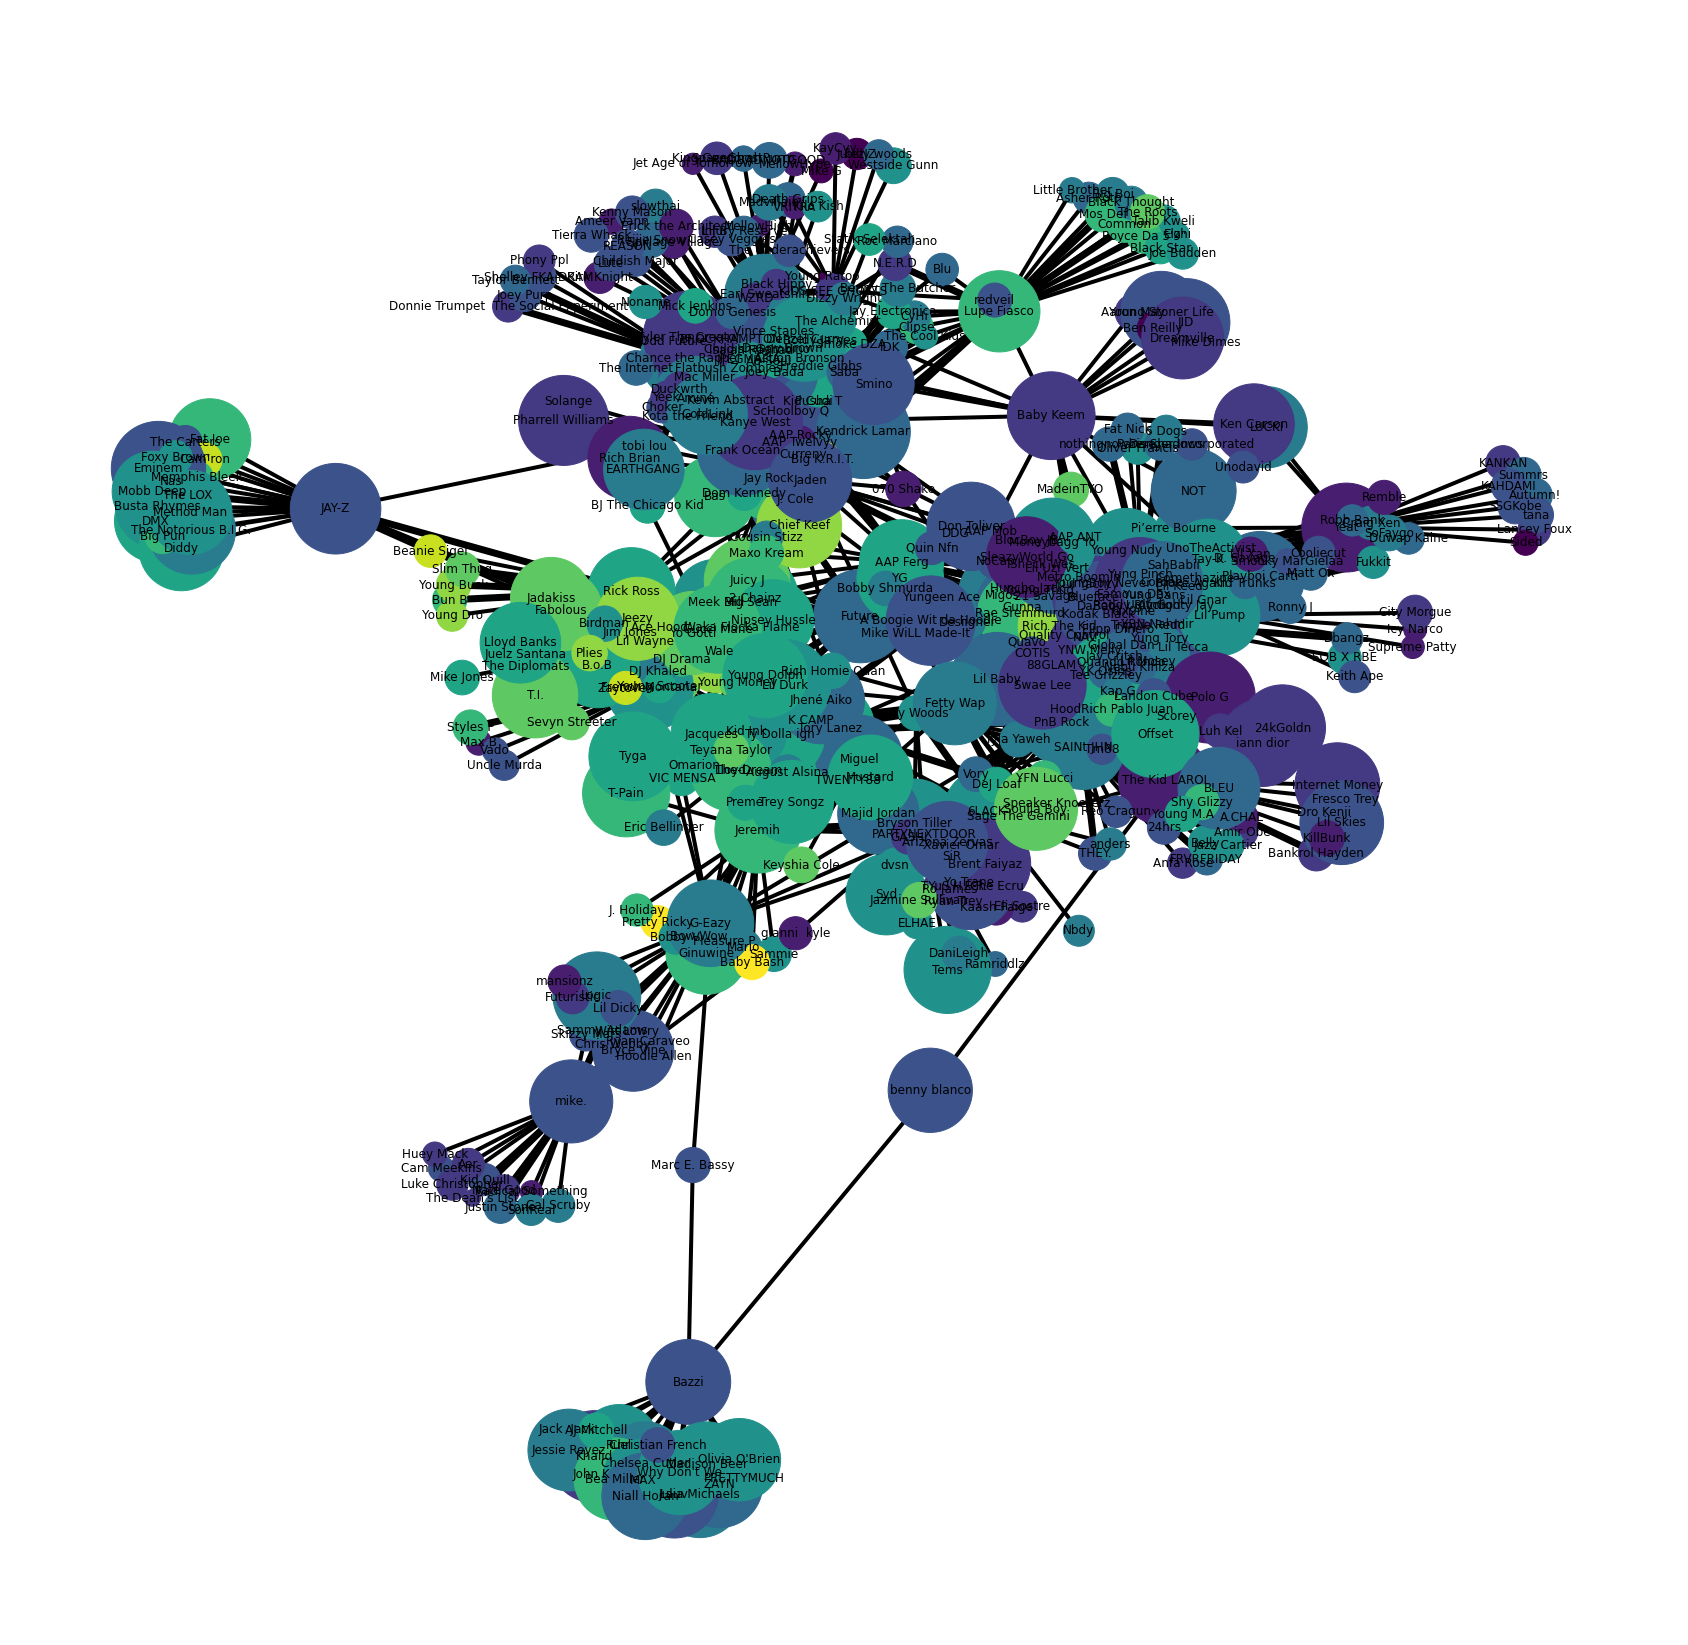

In [67]:

#build up the network 
G = nx.Graph() 

#Prepare node attributesm it make take a whike 
#use dictionary to retreive all artists songs 
Art = {}
keys1 = list(Nodes)
#add sub dictionary for each artist 
for i in keys1:
  Art[i] = {}
#add each artists songs to their dictionaries 
for key in keys1:
  for index, rows in dat2.iterrows():
    if rows.artist == key:
      Art[key][rows.song_name] = rows.song_info


#add node and weight
for i in range(len(Nodes)):
  G.add_node(Nodes[i], weight = Node_size[i], songs = Art[Nodes[i]],diversity = Node_color[i])
#add edge and weight 
G.add_edges_from(Edges)

#make edge weights more mutual 
for i in range(len(Edge_weights)):
  if Edge_weights[i] == 0:
    Edge_weights[i] = 2
  elif Edge_weights[i] == 1:
    Edge_weights[i] = 3
  elif Edge_weights[i] == 2:
    Edge_weights[i] = 4
  elif Edge_weights[i] == 3:
    Edge_weights[i] = 5
  elif Edge_weights[i] > 3:
    Edge_weights[i] = 7

fig, ax = plt.subplots(figsize=(30,30))

nx.draw(G,with_labels=True,node_size = Node_size,node_color =Node_color,width = Edge_weights)


#Direct Way to Reretive the Network 

In [40]:
import pandas as pd 
import numpy as np
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt

In [49]:
#laod all the dataset 
Node = pd.read_csv('Node_info.csv')
Edge = pd.read_csv('Edge_info.csv')
dat2 = pd.read_csv('Song_attribute.csv')
Node.head()

,node,node_size,node_color
0,J. Cole,8400.0,4.0
1,Meek Mill,7500.0,6.0
2,DJ Khaled,7600.0,9.0
3,Rick Ross,7600.0,7.0
4,Wale,7000.0,10.0
...,...,...,...
435,EARTHGANG,6500.0,5.0
436,Logic,7700.0,5.0
437,Futuristic,1080.0,2.0
438,Lil Dicky,1240.0,3.0


In [50]:
#extrac the data needed 
Nodes = Node['node'].tolist()
Node_size = Node['node_size'].tolist()
Node_color = Node['node_color'].tolist()
Edge_weight = Edge['edge_weight'].tolist()

In [ ]:
#build up the network 
G = nx.Graph() 

#Prepare node attributesm it make take a whike 
#use dictionary to retreive all artists songs 
Art = {}
keys1 = list(Nodes)
#add sub dictionary for each artist 
for i in keys1:
  Art[i] = {}
#add each artists songs to their dictionaries 
for key in keys1:
  for index, rows in dat2.iterrows():
    if rows.artist == key:
      Art[key][rows.song_name] = rows.song_info


#add node and weight
for i in range(len(Nodes)):
  G.add_node(Nodes[i], weight = Node_size[i], songs = Art[Nodes[i]])
#add edge and weight 
G.add_edges_from(Edges)

#make edge weights more mutual 
for i in range(len(Edge_weights)):
  if Edge_weights[i] == 0:
    Edge_weights[i] = 2
  elif Edge_weights[i] == 1:
    Edge_weights[i] = 3
  elif Edge_weights[i] == 2:
    Edge_weights[i] = 4
  elif Edge_weights[i] == 3:
    Edge_weights[i] = 5
  elif Edge_weights[i] > 3:
    Edge_weights[i] = 7

fig, ax = plt.subplots(figsize=(30,30))

nx.draw(G,with_labels=True,node_size = Node_size,node_color =Node_color,width = Edge_weights)